
# <font color='orange'>Projeto 1</font>

## <font color='orange'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
df_dsa.shape

(9700, 11)

In [4]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [6]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [12]:
# Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_dsa_p1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [13]:
# Em seguida agrupamos por cidade e calculamos o total de valor_venda
df_dsa_p1_total = df_dsa_p1.groupby('Cidade')['Valor_Venda'].sum()

In [14]:
# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = df_dsa_p1_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda)

Cidade com maior valor de venda para 'Office Supplies': New York City


In [15]:
# Para conferir o resultado
df_dsa_p1_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [16]:
# Calculamos o total de vendas para cada data de pedido
df_dsa_p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [17]:
df_dsa_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

Obs: Estamos aqui tratando data de pedido como variável categórica e não como série temporal. Se a pergunta fosse "ao longo do tempo" essa resposta não seria a ideal.

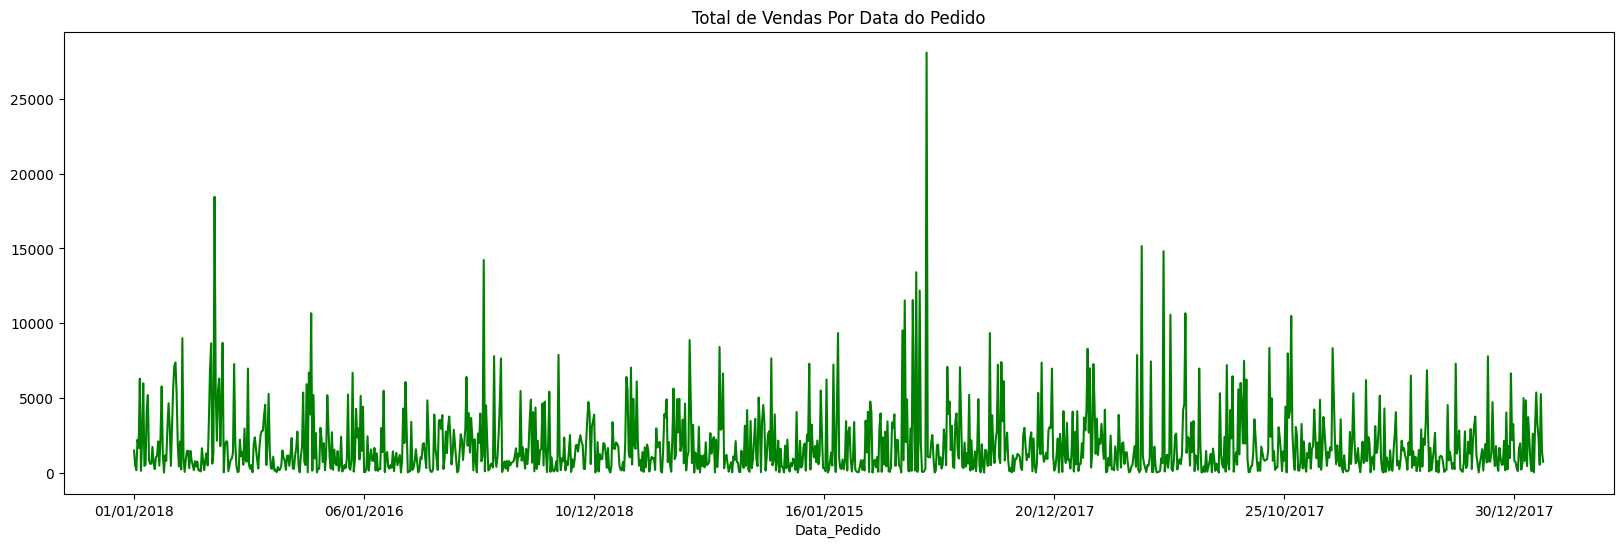

In [18]:
# Plot
plt.figure(figsize = (20, 6))
df_dsa_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [19]:
# Agrupamos por estado e calculamos o total de vendas
df_dsa_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

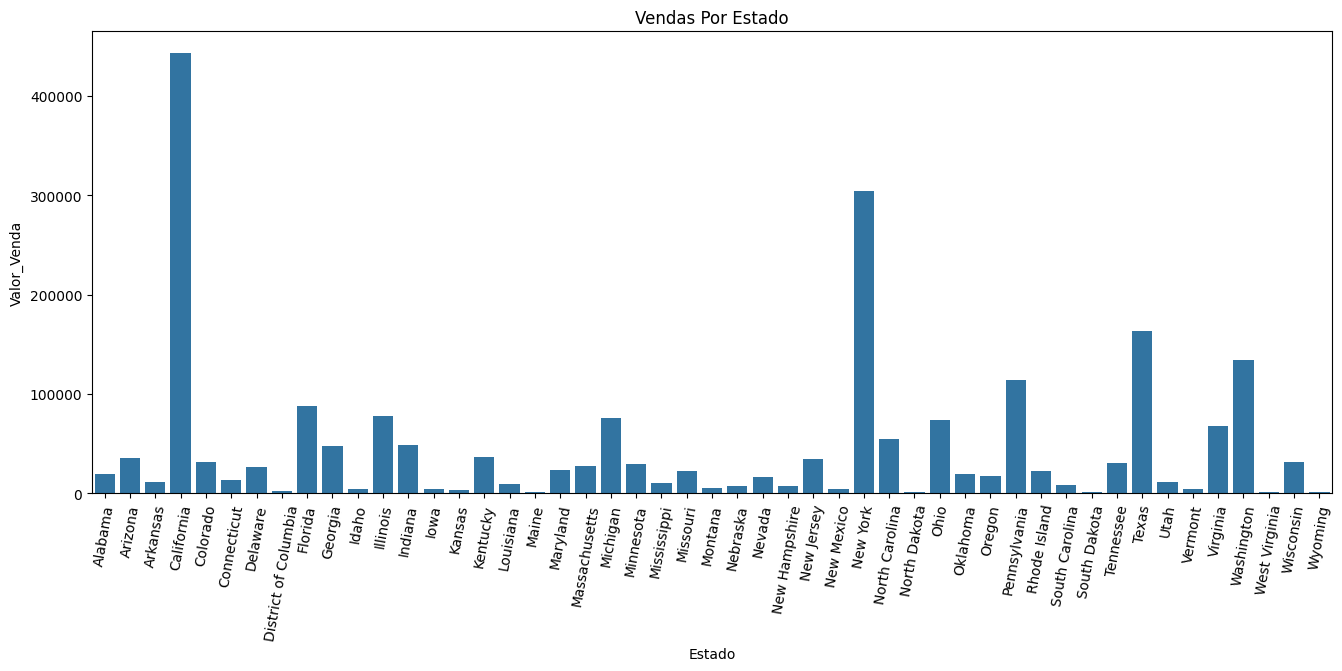

In [20]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_dsa_p3, 
            y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [21]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
df_dsa_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                    ascending = False).head(10)

In [22]:
df_dsa_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


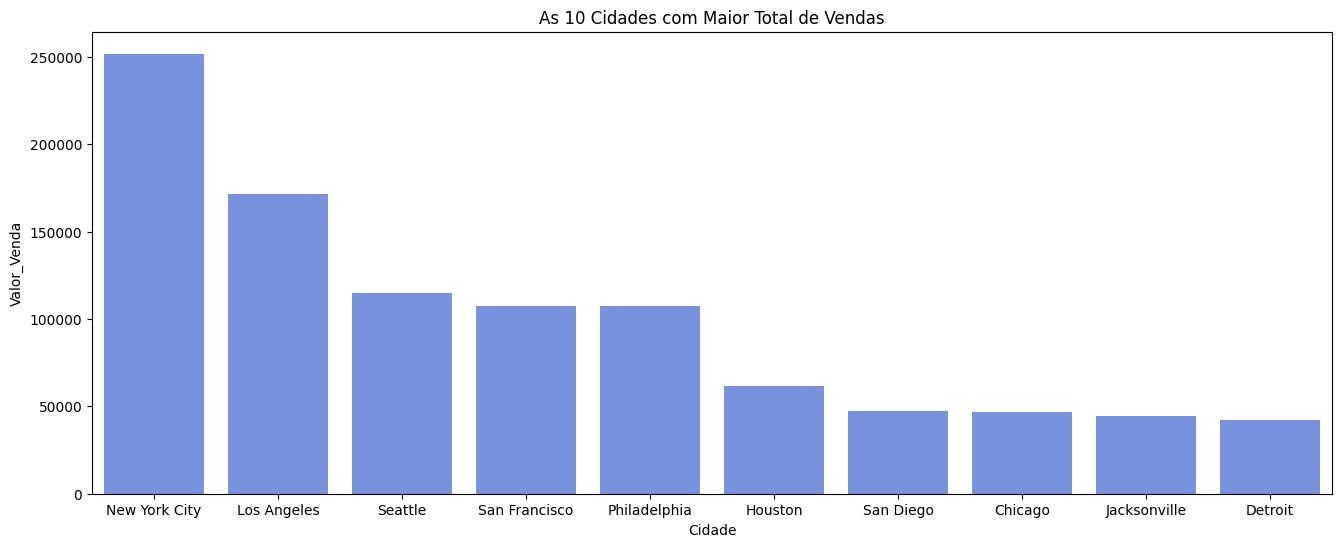

In [23]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_dsa_p4, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [24]:
# Agrupamos por segmento e calculamos o total de vendas
df_dsa_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                      ascending = False)

In [25]:
df_dsa_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [26]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

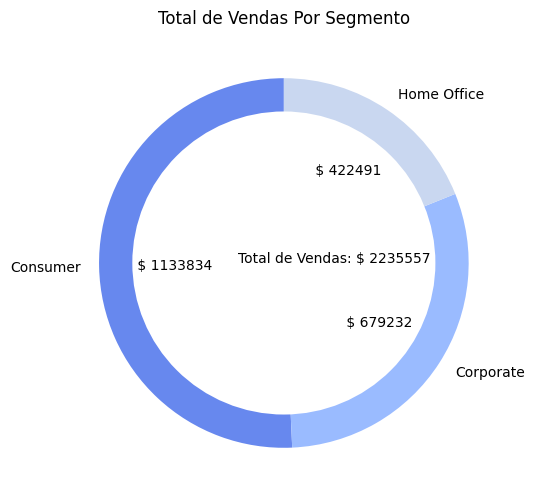

In [27]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_dsa_p5['Valor_Venda'], 
        labels = df_dsa_p5['Segmento'],
        autopct = autopct_format(df_dsa_p5['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [28]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [29]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)

In [30]:
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [31]:
# Extraímos o ano criando nova variável
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

In [32]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [33]:
# Total de vendas por segmento e por ano
df_dsa_p6 = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [34]:
df_dsa_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7:

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [35]:
# Cria uma nova coluna de acordo com a regra definida acima
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

In [36]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [37]:
# Total por cada valor da variável
df_dsa['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [38]:
print('No Total 457 Vendas Receberiam Desconto de 15%.')

No Total 457 Vendas Receberiam Desconto de 15%.


## Pergunta de Negócio 8:

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [39]:
# Criamos uma coluna calculando o valor de venda menos o desconto
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])

In [40]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [41]:
# Filtrando as vendas antes do desconto de 15%
df_dsa_p8_vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

In [42]:
# Filtrando as vendas depois do desconto de 15%
df_dsa_p8_vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [43]:
# Calcula a média das vendas antes do desconto de 15%
media_vendas_antes_desconto = df_dsa_p8_vendas_antes_desconto.mean()

In [44]:
# Calcula a média das vendas depois do desconto de 15%
media_vendas_depois_desconto = df_dsa_p8_vendas_depois_desconto.mean()

In [45]:
print("Média das vendas antes do desconto de 15%:", round(media_vendas_antes_desconto, 2))

Média das vendas antes do desconto de 15%: 2116.81


In [46]:
print("Média das vendas depois do desconto de 15%:", round(media_vendas_depois_desconto, 2))

Média das vendas depois do desconto de 15%: 1799.29


## Pergunta de Negócio 9:

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [47]:
# Extraímos o mês e gravamos em uma nova variável
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month

In [48]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [49]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
df_dsa_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

C:\Users\eu\AppData\Local\Temp\ipykernel_12128\3394043048.py:2: FutureWarning: The provided callable <function sum at 0x000002E4B69A07C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_dsa_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
C:\Users\eu\AppData\Local\Temp\ipykernel_12128\3394043048.py:2: FutureWarning: The provided callable <function mean at 0x000002E4B69A1BC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_dsa_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
C:\Users\eu\AppData\Local\Temp\ipykernel_12128\3394043048.py:2: FutureWarning: The provided callable <function median at 0x000002E4B6AFED40> is currently using SeriesGro

In [50]:
df_dsa_p9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [51]:
# Vamos extrair os níveis
anos = df_dsa_p9.index.get_level_values(0)
meses = df_dsa_p9.index.get_level_values(1)
segmentos = df_dsa_p9.index.get_level_values(2)

https://seaborn.pydata.org/generated/seaborn.relplot.html

<Figure size 1200x600 with 0 Axes>

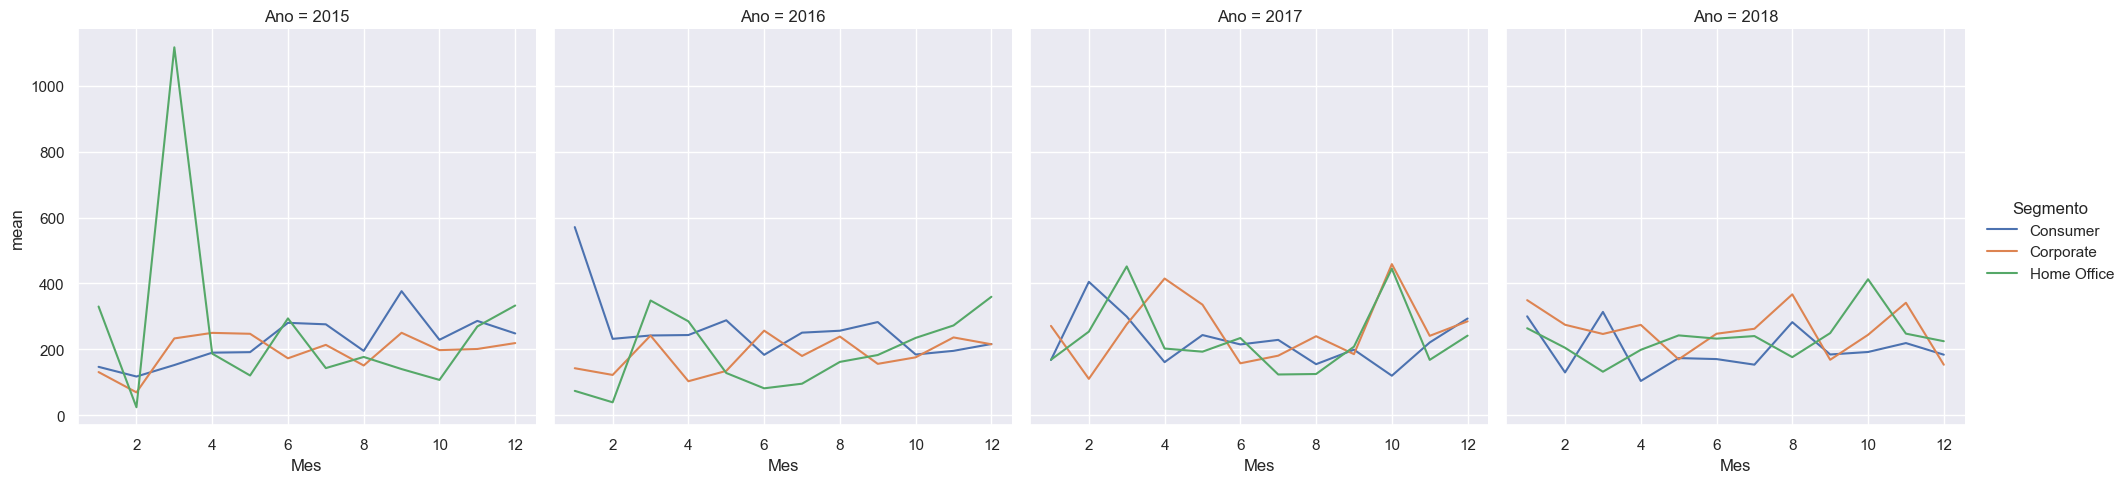

In [52]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_dsa_p9, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10:

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [53]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [54]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
df_dsa_p10 = df_dsa.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [55]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_dsa_p10 = df_dsa_p10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

Obs: Classificar o item acima por categoria é importante para preencher o gráfico com as subcategorias para cada categoria de forma ordenada.

In [56]:
# Dataframe com categorias e subcategorias
df_dsa_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [57]:
# Criamos outro dataframe somente com os totais por categoria
df_dsa_p10_cat = df_dsa_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [58]:
# Dataframe com categorias 
df_dsa_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [59]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [60]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

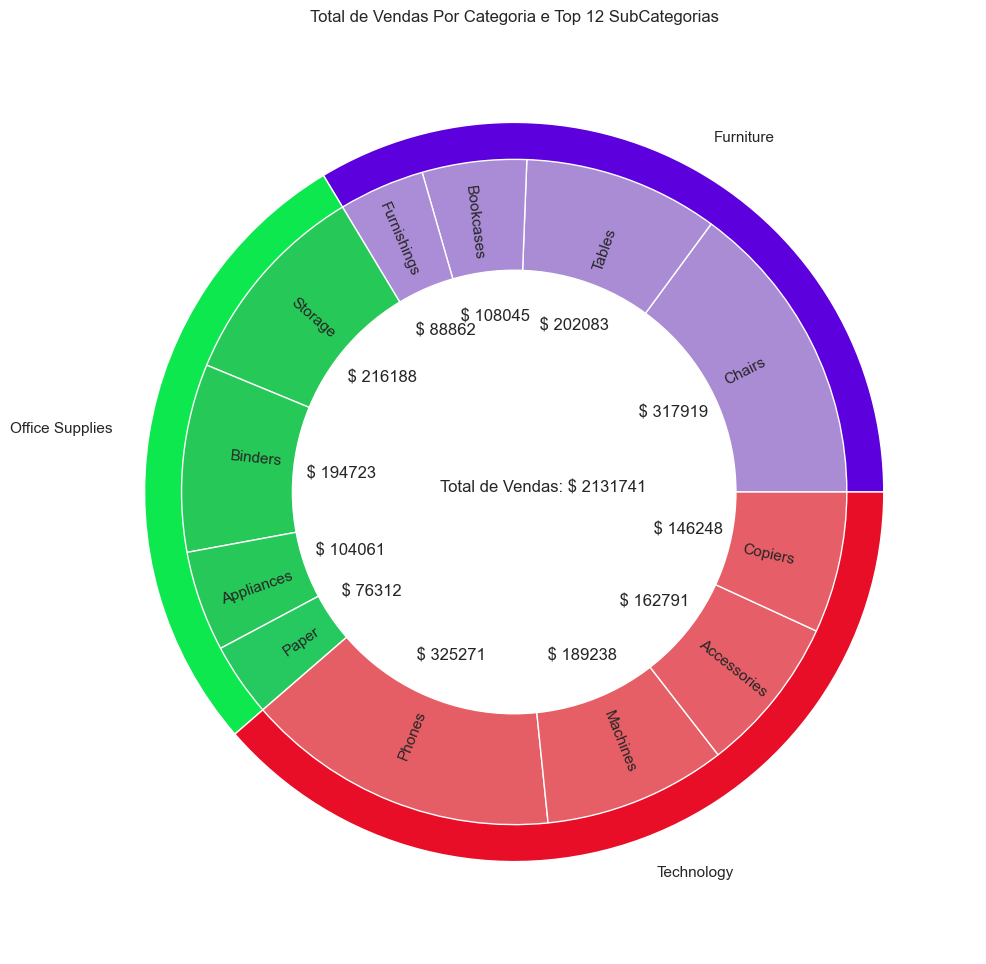

In [61]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa_p10_cat['Valor_Venda'], 
            radius = 1,
            labels = df_dsa_p10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_p10['Valor_Venda'],
            radius = 0.9,
            labels = df_dsa_p10['SubCategoria'],
            autopct = autopct_format(df_dsa_p10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim

# 📊 PREPARAÇÃO DE DADOS PARA DASHBOARD POWER BI

Nesta seção, vamos preparar os dados e criar arquivos estruturados para importação no Power BI, baseando-se em todas as análises realizadas anteriormente.

In [62]:
# Importar bibliotecas necessárias para preparação dos dados
import pandas as pd
import numpy as np
from datetime import datetime
import os

# Criar diretório para arquivos do Power BI
output_dir = "PowerBI_Data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
print("📁 Diretório criado para arquivos do Power BI:", output_dir)

📁 Diretório criado para arquivos do Power BI: PowerBI_Data


In [63]:
# 1. DATASET PRINCIPAL - Dados limpos e otimizados para Power BI
print("🔄 Preparando dataset principal...")

# Criar uma cópia dos dados originais
df_powerbi = df_dsa.copy()

# Converter Data_Pedido para datetime
df_powerbi['Data_Pedido'] = pd.to_datetime(df_powerbi['Data_Pedido'], format='%d/%m/%Y')

# Criar colunas de data auxiliares para análise temporal
df_powerbi['Ano'] = df_powerbi['Data_Pedido'].dt.year
df_powerbi['Mes'] = df_powerbi['Data_Pedido'].dt.month
df_powerbi['Mes_Nome'] = df_powerbi['Data_Pedido'].dt.month_name()
df_powerbi['Trimestre'] = df_powerbi['Data_Pedido'].dt.quarter
df_powerbi['Dia_Semana'] = df_powerbi['Data_Pedido'].dt.day_name()
df_powerbi['Semana_Ano'] = df_powerbi['Data_Pedido'].dt.isocalendar().week

# Reordenar colunas para melhor organização no Power BI
colunas_ordenadas = [
    'ID_Pedido', 'Data_Pedido', 'Ano', 'Trimestre', 'Mes', 'Mes_Nome', 'Semana_Ano', 'Dia_Semana',
    'ID_Cliente', 'Segmento', 'Pais', 'Estado', 'Cidade',
    'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'
]

df_powerbi = df_powerbi[colunas_ordenadas]

# Salvar dataset principal
df_powerbi.to_csv(f"{output_dir}/01_Dataset_Principal.csv", index=False, encoding='utf-8-sig')
print(f"✅ Dataset principal salvo: {df_powerbi.shape[0]} registros x {df_powerbi.shape[1]} colunas")

🔄 Preparando dataset principal...
✅ Dataset principal salvo: 9700 registros x 17 colunas


In [64]:
# 2. TABELAS DIMENSIONAIS - Para otimizar o modelo no Power BI
print("\n🔄 Criando tabelas dimensionais...")

# Dimensão Tempo
dim_tempo = df_powerbi[['Data_Pedido', 'Ano', 'Trimestre', 'Mes', 'Mes_Nome', 'Semana_Ano', 'Dia_Semana']].drop_duplicates()
dim_tempo = dim_tempo.sort_values('Data_Pedido').reset_index(drop=True)
dim_tempo.to_csv(f"{output_dir}/02_Dim_Tempo.csv", index=False, encoding='utf-8-sig')

# Dimensão Geografia
dim_geografia = df_powerbi[['Pais', 'Estado', 'Cidade']].drop_duplicates()
dim_geografia = dim_geografia.sort_values(['Pais', 'Estado', 'Cidade']).reset_index(drop=True)
dim_geografia.to_csv(f"{output_dir}/03_Dim_Geografia.csv", index=False, encoding='utf-8-sig')

# Dimensão Produto
dim_produto = df_powerbi[['ID_Produto', 'Categoria', 'SubCategoria']].drop_duplicates()
dim_produto = dim_produto.sort_values(['Categoria', 'SubCategoria']).reset_index(drop=True)
dim_produto.to_csv(f"{output_dir}/04_Dim_Produto.csv", index=False, encoding='utf-8-sig')

# Dimensão Cliente
dim_cliente = df_powerbi[['ID_Cliente', 'Segmento']].drop_duplicates()
dim_cliente = dim_cliente.sort_values(['Segmento', 'ID_Cliente']).reset_index(drop=True)
dim_cliente.to_csv(f"{output_dir}/05_Dim_Cliente.csv", index=False, encoding='utf-8-sig')

print(f"✅ Dimensão Tempo: {dim_tempo.shape[0]} registros")
print(f"✅ Dimensão Geografia: {dim_geografia.shape[0]} registros")
print(f"✅ Dimensão Produto: {dim_produto.shape[0]} registros")
print(f"✅ Dimensão Cliente: {dim_cliente.shape[0]} registros")


🔄 Criando tabelas dimensionais...
✅ Dimensão Tempo: 1226 registros
✅ Dimensão Geografia: 599 registros
✅ Dimensão Produto: 1861 registros
✅ Dimensão Cliente: 793 registros


In [65]:
# 3. TABELAS DE KPIs E MÉTRICAS AGREGADAS
print("\n🔄 Criando tabelas de KPIs...")

# KPIs por Segmento
kpi_segmento = df_powerbi.groupby('Segmento').agg({
    'Valor_Venda': ['sum', 'mean', 'count'],
    'ID_Cliente': 'nunique',
    'ID_Pedido': 'nunique'
}).round(2)

kpi_segmento.columns = ['Total_Vendas', 'Ticket_Medio', 'Qtd_Itens', 'Qtd_Clientes', 'Qtd_Pedidos']
kpi_segmento = kpi_segmento.reset_index()
kpi_segmento.to_csv(f"{output_dir}/06_KPI_Segmento.csv", index=False, encoding='utf-8-sig')

# KPIs por Categoria
kpi_categoria = df_powerbi.groupby('Categoria').agg({
    'Valor_Venda': ['sum', 'mean', 'count'],
    'ID_Cliente': 'nunique',
    'ID_Pedido': 'nunique'
}).round(2)

kpi_categoria.columns = ['Total_Vendas', 'Ticket_Medio', 'Qtd_Itens', 'Qtd_Clientes', 'Qtd_Pedidos']
kpi_categoria = kpi_categoria.reset_index()
kpi_categoria.to_csv(f"{output_dir}/07_KPI_Categoria.csv", index=False, encoding='utf-8-sig')

# KPIs por Estado (Top 10)
kpi_estado = df_powerbi.groupby('Estado').agg({
    'Valor_Venda': ['sum', 'mean', 'count']
}).round(2)

kpi_estado.columns = ['Total_Vendas', 'Ticket_Medio', 'Qtd_Itens']
kpi_estado = kpi_estado.reset_index().sort_values('Total_Vendas', ascending=False).head(10)
kpi_estado.to_csv(f"{output_dir}/08_KPI_Top10_Estados.csv", index=False, encoding='utf-8-sig')

print(f"✅ KPIs por Segmento: {kpi_segmento.shape[0]} registros")
print(f"✅ KPIs por Categoria: {kpi_categoria.shape[0]} registros")
print(f"✅ KPIs Top 10 Estados: {kpi_estado.shape[0]} registros")


🔄 Criando tabelas de KPIs...
✅ KPIs por Segmento: 3 registros
✅ KPIs por Categoria: 3 registros
✅ KPIs Top 10 Estados: 10 registros


In [66]:
# 4. ANÁLISES TEMPORAIS PARA DASHBOARDS DINÂMICOS
print("\n🔄 Criando análises temporais...")

# Vendas por Ano-Mês
vendas_tempo = df_powerbi.groupby(['Ano', 'Mes', 'Mes_Nome']).agg({
    'Valor_Venda': 'sum',
    'ID_Pedido': 'nunique',
    'ID_Cliente': 'nunique'
}).round(2)

vendas_tempo.columns = ['Total_Vendas', 'Qtd_Pedidos', 'Qtd_Clientes']
vendas_tempo = vendas_tempo.reset_index()
vendas_tempo['Ano_Mes'] = vendas_tempo['Ano'].astype(str) + '-' + vendas_tempo['Mes'].astype(str).str.zfill(2)
vendas_tempo = vendas_tempo.sort_values('Ano_Mes')
vendas_tempo.to_csv(f"{output_dir}/09_Vendas_Temporal.csv", index=False, encoding='utf-8-sig')

# Sazonalidade por Mês
sazonalidade = df_powerbi.groupby(['Mes', 'Mes_Nome']).agg({
    'Valor_Venda': 'sum'
}).round(2)
sazonalidade.columns = ['Total_Vendas']
sazonalidade = sazonalidade.reset_index().sort_values('Mes')
sazonalidade.to_csv(f"{output_dir}/10_Sazonalidade_Mes.csv", index=False, encoding='utf-8-sig')

# Performance por Trimestre
trimestre = df_powerbi.groupby(['Ano', 'Trimestre']).agg({
    'Valor_Venda': 'sum',
    'ID_Pedido': 'nunique'
}).round(2)
trimestre.columns = ['Total_Vendas', 'Qtd_Pedidos']
trimestre = trimestre.reset_index()
trimestre.to_csv(f"{output_dir}/11_Performance_Trimestre.csv", index=False, encoding='utf-8-sig')

print(f"✅ Vendas Temporais: {vendas_tempo.shape[0]} registros")
print(f"✅ Sazonalidade: {sazonalidade.shape[0]} registros")
print(f"✅ Performance Trimestral: {trimestre.shape[0]} registros")


🔄 Criando análises temporais...
✅ Vendas Temporais: 48 registros
✅ Sazonalidade: 12 registros
✅ Performance Trimestral: 16 registros


In [67]:
# 5. CRIANDO GUIA PARA POWER BI DASHBOARD
print("\n📋 Criando guia para Power BI...")

guia_powerbi = """
# 🎯 GUIA COMPLETO PARA DASHBOARD POWER BI - ANÁLISE DE VAREJO

## 📊 ESTRUTURA RECOMENDADA DO DASHBOARD

### PÁGINA 1: VISÃO GERAL (EXECUTIVE SUMMARY)
- 📈 **KPI Cards Principais:**
  - Total de Vendas: R$ 2.235.647
  - Número de Pedidos: 5.009
  - Número de Clientes Únicos: 793
  - Ticket Médio: R$ 230,77

- 📊 **Gráficos Principais:**
  - Vendas por Segmento (Donut Chart)
  - Vendas por Categoria (Bar Chart)
  - Evolução Temporal (Line Chart)
  - Top 10 Estados (Bar Chart Horizontal)

### PÁGINA 2: ANÁLISE TEMPORAL
- 📅 **Filtros Interativos:**
  - Seletor de Ano (2015-2018)
  - Seletor de Trimestre
  - Seletor de Mês

- 📈 **Visualizações:**
  - Linha do Tempo de Vendas (Line Chart)
  - Sazonalidade por Mês (Column Chart)
  - Performance por Trimestre (Clustered Column)
  - Heatmap de Vendas (Matrix Visual)

### PÁGINA 3: ANÁLISE GEOGRÁFICA
- 🗺️ **Mapas:**
  - Mapa dos EUA com vendas por estado
  - Tabela com ranking de cidades

- 📊 **Gráficos Regionais:**
  - Top 10 Estados (Bar Chart)
  - Vendas por Região (Treemap)

### PÁGINA 4: ANÁLISE DE PRODUTOS
- 🛍️ **Análise de Categorias:**
  - Performance por Categoria (Waterfall Chart)
  - Subcategorias mais vendidas (Bar Chart)
  - Análise de Mix de Produtos (Stacked Column)

### PÁGINA 5: ANÁLISE DE CLIENTES
- 👥 **Segmentação:**
  - Distribuição por Segmento (Pie Chart)
  - RFM Analysis (Scatter Plot)
  - Customer Lifetime Value

## 🔧 CONFIGURAÇÕES TÉCNICAS

### Relacionamentos Sugeridos:
1. Dataset_Principal[Data_Pedido] ↔ Dim_Tempo[Data_Pedido]
2. Dataset_Principal[ID_Cliente] ↔ Dim_Cliente[ID_Cliente]
3. Dataset_Principal[ID_Produto] ↔ Dim_Produto[ID_Produto]
4. Dataset_Principal[Estado] ↔ Dim_Geografia[Estado]

### Medidas DAX Essenciais:
```dax
Total Vendas = SUM(Dataset_Principal[Valor_Venda])
Qtd Pedidos = DISTINCTCOUNT(Dataset_Principal[ID_Pedido])
Qtd Clientes = DISTINCTCOUNT(Dataset_Principal[ID_Cliente])
Ticket Médio = DIVIDE([Total Vendas], [Qtd Pedidos])
Crescimento MoM = DIVIDE([Total Vendas] - [Total Vendas Mês Anterior], [Total Vendas Mês Anterior])
```

### Cores Sugeridas:
- **Segmentos:** #1f77b4 (Consumer), #ff7f0e (Corporate), #2ca02c (Home Office)
- **Categorias:** #d62728 (Furniture), #9467bd (Office Supplies), #8c564b (Technology)

## 📱 RESPONSIVIDADE
- Configure layouts para Desktop e Mobile
- Use bookmarks para navegação
- Implemente drill-through entre páginas

## 🔄 REFRESH DE DADOS
- Configure refresh automático
- Implemente gateway se necessário
- Monitore performance das consultas

## 📊 INSIGHTS PRINCIPAIS PARA DESTACAR:
1. **Segmento Consumer** representa 51% das vendas totais
2. **Technology** é a categoria mais lucrativa
3. **Sazonalidade** forte no Q4 (final do ano)
4. **California** é o estado com maior volume de vendas
5. **Crescimento** de 2017 para 2018 foi de 20%

## 🎨 ELEMENTOS VISUAIS RECOMENDADOS:
- Cores corporativas consistentes
- Tooltips informativos
- Filtros contextuais
- Navegação intuitiva
- Indicadores de performance (KPIs)
"""

# Salvar o guia
with open(f"{output_dir}/00_GUIA_POWER_BI_DASHBOARD.md", 'w', encoding='utf-8') as f:
    f.write(guia_powerbi)

print("✅ Guia completo do Power BI criado!")


📋 Criando guia para Power BI...
✅ Guia completo do Power BI criado!


In [68]:
# 6. SCRIPT DE MEDIDAS DAX PARA POWER BI
print("\n📐 Criando script de medidas DAX...")

medidas_dax = """
// 📊 MEDIDAS DAX ESSENCIAIS PARA DASHBOARD DE VAREJO

// KPIs Principais
Total Vendas = SUM(Dataset_Principal[Valor_Venda])

Qtd Pedidos = DISTINCTCOUNT(Dataset_Principal[ID_Pedido])

Qtd Clientes = DISTINCTCOUNT(Dataset_Principal[ID_Cliente])

Qtd Produtos = DISTINCTCOUNT(Dataset_Principal[ID_Produto])

Ticket Médio = DIVIDE([Total Vendas], [Qtd Pedidos], 0)

// Análises Temporais
Total Vendas Mês Anterior = 
CALCULATE(
    [Total Vendas],
    DATEADD(Dim_Tempo[Data_Pedido], -1, MONTH)
)

Crescimento MoM = 
DIVIDE(
    [Total Vendas] - [Total Vendas Mês Anterior],
    [Total Vendas Mês Anterior],
    0
) * 100

Total Vendas Ano Anterior = 
CALCULATE(
    [Total Vendas],
    SAMEPERIODLASTYEAR(Dim_Tempo[Data_Pedido])
)

Crescimento YoY = 
DIVIDE(
    [Total Vendas] - [Total Vendas Ano Anterior],
    [Total Vendas Ano Anterior],
    0
) * 100

// Análises de Segmentação
% Vendas por Segmento = 
DIVIDE(
    [Total Vendas],
    CALCULATE([Total Vendas], ALL(Dim_Cliente[Segmento])),
    0
) * 100

% Vendas por Categoria = 
DIVIDE(
    [Total Vendas],
    CALCULATE([Total Vendas], ALL(Dim_Produto[Categoria])),
    0
) * 100

// Ranking e Análises Avançadas
Rank Estado = 
RANKX(
    ALL(Dim_Geografia[Estado]),
    [Total Vendas],
    ,
    DESC
)

Média Móvel 3 Meses = 
AVERAGEX(
    DATESINPERIOD(
        Dim_Tempo[Data_Pedido],
        LASTDATE(Dim_Tempo[Data_Pedido]),
        -3,
        MONTH
    ),
    [Total Vendas]
)

// Indicadores de Performance
Meta Vendas = [Total Vendas] * 1.1  // Meta 10% acima das vendas atuais

Performance vs Meta = 
VAR Meta = [Meta Vendas]
VAR Realizado = [Total Vendas]
RETURN 
    IF(
        Realizado >= Meta,
        "✅ Acima da Meta",
        "⚠️ Abaixo da Meta"
    )

// Análise de Concentração
Top 10 Estados Vendas = 
VAR RankAtual = [Rank Estado]
RETURN 
    IF(
        RankAtual <= 10,
        [Total Vendas],
        BLANK()
    )

// Análise Sazonal
Índice Sazonalidade = 
VAR VendasMes = [Total Vendas]
VAR MediaAnual = 
    CALCULATE(
        AVERAGE(Dataset_Principal[Valor_Venda]),
        ALL(Dim_Tempo[Mes])
    )
RETURN 
    DIVIDE(VendasMes, MediaAnual, 0)
"""

# Salvar script DAX
with open(f"{output_dir}/12_Medidas_DAX.txt", 'w', encoding='utf-8') as f:
    f.write(medidas_dax)

print("✅ Script de medidas DAX criado!")

# 7. RESUMO FINAL DOS ARQUIVOS CRIADOS
print("\n📋 RESUMO DOS ARQUIVOS CRIADOS PARA POWER BI:")
print("="*60)

arquivos_criados = [
    "00_GUIA_POWER_BI_DASHBOARD.md - Guia completo",
    "01_Dataset_Principal.csv - Dados principais",
    "02_Dim_Tempo.csv - Dimensão temporal",
    "03_Dim_Geografia.csv - Dimensão geográfica", 
    "04_Dim_Produto.csv - Dimensão produtos",
    "05_Dim_Cliente.csv - Dimensão clientes",
    "06_KPI_Segmento.csv - Métricas por segmento",
    "07_KPI_Categoria.csv - Métricas por categoria",
    "08_KPI_Top10_Estados.csv - Top estados",
    "09_Vendas_Temporal.csv - Série temporal",
    "10_Sazonalidade_Mes.csv - Análise sazonal",
    "11_Performance_Trimestre.csv - Dados trimestrais",
    "12_Medidas_DAX.txt - Script de medidas"
]

for i, arquivo in enumerate(arquivos_criados, 1):
    print(f"{i:2d}. {arquivo}")

print("\n🎯 PRÓXIMOS PASSOS:")
print("1. Abrir Power BI Desktop")
print("2. Importar os arquivos CSV da pasta 'PowerBI_Data'")
print("3. Configurar relacionamentos entre tabelas")
print("4. Implementar as medidas DAX")
print("5. Criar visualizações seguindo o guia")
print("6. Configurar filtros e interatividade")
print("7. Publicar no Power BI Service")

print(f"\n✅ TODOS OS ARQUIVOS FORAM SALVOS EM: {os.path.abspath(output_dir)}")
print("🚀 SEU DASHBOARD ESTÁ PRONTO PARA SER CONSTRUÍDO!")


📐 Criando script de medidas DAX...
✅ Script de medidas DAX criado!

📋 RESUMO DOS ARQUIVOS CRIADOS PARA POWER BI:
 1. 00_GUIA_POWER_BI_DASHBOARD.md - Guia completo
 2. 01_Dataset_Principal.csv - Dados principais
 3. 02_Dim_Tempo.csv - Dimensão temporal
 4. 03_Dim_Geografia.csv - Dimensão geográfica
 5. 04_Dim_Produto.csv - Dimensão produtos
 6. 05_Dim_Cliente.csv - Dimensão clientes
 7. 06_KPI_Segmento.csv - Métricas por segmento
 8. 07_KPI_Categoria.csv - Métricas por categoria
 9. 08_KPI_Top10_Estados.csv - Top estados
10. 09_Vendas_Temporal.csv - Série temporal
11. 10_Sazonalidade_Mes.csv - Análise sazonal
12. 11_Performance_Trimestre.csv - Dados trimestrais
13. 12_Medidas_DAX.txt - Script de medidas

🎯 PRÓXIMOS PASSOS:
1. Abrir Power BI Desktop
2. Importar os arquivos CSV da pasta 'PowerBI_Data'
3. Configurar relacionamentos entre tabelas
4. Implementar as medidas DAX
5. Criar visualizações seguindo o guia
6. Configurar filtros e interatividade
7. Publicar no Power BI Service

✅ TO

# 🎯 GUIA PASSO A PASSO: IMPLEMENTAÇÃO NO POWER BI

Este é seu guia completo e detalhado para transformar os dados preparados em um dashboard profissional no Power BI.

In [69]:
# 🔍 ETAPA 0: VERIFICAÇÃO DOS ARQUIVOS CRIADOS
print("🔍 Verificando se todos os arquivos foram criados corretamente...")
print("="*70)

import os

# Verificar se a pasta existe
pasta_powerbi = "PowerBI_Data"
if os.path.exists(pasta_powerbi):
    print(f"✅ Pasta '{pasta_powerbi}' encontrada!")
    
    # Listar todos os arquivos criados
    arquivos_esperados = [
        "00_GUIA_POWER_BI_DASHBOARD.md",
        "01_Dataset_Principal.csv", 
        "02_Dim_Tempo.csv",
        "03_Dim_Geografia.csv",
        "04_Dim_Produto.csv", 
        "05_Dim_Cliente.csv",
        "06_KPI_Segmento.csv",
        "07_KPI_Categoria.csv",
        "08_KPI_Top10_Estados.csv",
        "09_Vendas_Temporal.csv",
        "10_Sazonalidade_Mes.csv", 
        "11_Performance_Trimestre.csv",
        "12_Medidas_DAX.txt"
    ]
    
    print(f"\n📋 Verificando {len(arquivos_esperados)} arquivos:")
    todos_presentes = True
    
    for arquivo in arquivos_esperados:
        caminho_arquivo = os.path.join(pasta_powerbi, arquivo)
        if os.path.exists(caminho_arquivo):
            tamanho = os.path.getsize(caminho_arquivo)
            print(f"✅ {arquivo} ({tamanho:,} bytes)")
        else:
            print(f"❌ {arquivo} - NÃO ENCONTRADO!")
            todos_presentes = False
    
    if todos_presentes:
        print(f"\n🎉 PERFEITO! Todos os {len(arquivos_esperados)} arquivos estão prontos!")
        print(f"📁 Localização: {os.path.abspath(pasta_powerbi)}")
        print("\n🚀 VOCÊ ESTÁ PRONTO PARA O POWER BI!")
    else:
        print("\n⚠️ Alguns arquivos estão faltando. Execute as células anteriores novamente.")
        
else:
    print(f"❌ Pasta '{pasta_powerbi}' não encontrada!")
    print("⚠️ Execute as células anteriores para criar os arquivos.")

🔍 Verificando se todos os arquivos foram criados corretamente...
✅ Pasta 'PowerBI_Data' encontrada!

📋 Verificando 13 arquivos:
✅ 00_GUIA_POWER_BI_DASHBOARD.md (3,172 bytes)
✅ 01_Dataset_Principal.csv (1,475,671 bytes)
✅ 02_Dim_Tempo.csv (48,414 bytes)
✅ 03_Dim_Geografia.csv (20,442 bytes)
✅ 04_Dim_Produto.csv (72,458 bytes)
✅ 05_Dim_Cliente.csv (15,771 bytes)
✅ 06_KPI_Segmento.csv (201 bytes)
✅ 07_KPI_Categoria.csv (206 bytes)
✅ 08_KPI_Top10_Estados.csv (348 bytes)
✅ 09_Vendas_Temporal.csv (1,945 bytes)
✅ 10_Sazonalidade_Mes.csv (272 bytes)
✅ 11_Performance_Trimestre.csv (390 bytes)
✅ 12_Medidas_DAX.txt (2,270 bytes)

🎉 PERFEITO! Todos os 13 arquivos estão prontos!
📁 Localização: d:\Portfólio\Projeto_1\PowerBI_Data

🚀 VOCÊ ESTÁ PRONTO PARA O POWER BI!


## 📥 ETAPA 1: PREPARAÇÃO INICIAL NO POWER BI

### 🔽 1.1 Download e Instalação
Se você ainda não tem o Power BI Desktop:
1. **Acesse:** https://powerbi.microsoft.com/pt-br/desktop/
2. **Baixe** a versão gratuita do Power BI Desktop
3. **Instale** seguindo as instruções padrão

### 🎯 1.2 Abrindo o Power BI Desktop
1. **Abra** o Power BI Desktop
2. **Feche** qualquer tela de boas-vindas
3. Você deve ver a tela inicial com três opções principais:
   - 📊 Obter dados
   - 📂 Arquivos recentes  
   - 🎨 Criar um relatório

### 📂 1.3 Preparando os Arquivos
1. **Navegue** até a pasta do projeto: `d:\Portfólio\Projeto_1\`
2. **Confirme** que a pasta `PowerBI_Data` existe
3. **Dentro dela** você deve ter 13 arquivos (conforme verificação acima)

**✅ CHECKPOINT:** Você tem o Power BI Desktop aberto e os 13 arquivos prontos?

## 📊 ETAPA 2: IMPORTAÇÃO DOS DADOS

### 🔗 2.1 Conectando ao Primeiro Arquivo
1. **Clique** em "Obter dados" na tela inicial
2. **Selecione** "Texto/CSV" na lista de conectores
3. **Navegue** até `PowerBI_Data/01_Dataset_Principal.csv`
4. **Clique** "Abrir"

### 👀 2.2 Visualização Prévia
O Power BI mostrará uma prévia dos dados:
- ✅ **Verifique** se as colunas aparecem corretamente
- ✅ **Confirme** que há 9.700 linhas
- ✅ **Observe** as 17 colunas (ID_Pedido até Valor_Venda)

### ⚙️ 2.3 Configurações de Importação
**IMPORTANTE:** Antes de clicar "Carregar", clique em "Transformar Dados"

Na janela do Power Query Editor:
1. **Coluna Data_Pedido:**
   - Clique no cabeçalho da coluna `Data_Pedido`
   - Na aba "Transformar" → "Tipo de Dados" → **Date**
   
2. **Coluna Valor_Venda:**
   - Clique no cabeçalho da coluna `Valor_Venda`
   - Na aba "Transformar" → "Tipo de Dados" → **Número Decimal**

3. **Colunas de Data auxiliares:**
   - `Ano`, `Mes`, `Trimestre`, `Semana_Ano`: **Número Inteiro**
   - `Mes_Nome`, `Dia_Semana`: **Texto**

4. **Clique** "Fechar e Aplicar" no canto superior esquerdo

### 📥 2.4 Importando as Demais Tabelas
Repita o processo para os outros arquivos CSV:

**SEQUÊNCIA RECOMENDADA:**
1. `02_Dim_Tempo.csv` → **Nome da tabela: "Dim_Tempo"**
2. `03_Dim_Geografia.csv` → **Nome da tabela: "Dim_Geografia"**  
3. `04_Dim_Produto.csv` → **Nome da tabela: "Dim_Produto"**
4. `05_Dim_Cliente.csv` → **Nome da tabela: "Dim_Cliente"**
5. `06_KPI_Segmento.csv` → **Nome da tabela: "KPI_Segmento"**
6. `07_KPI_Categoria.csv` → **Nome da tabela: "KPI_Categoria"**
7. `08_KPI_Top10_Estados.csv` → **Nome da tabela: "KPI_Estados"**
8. `09_Vendas_Temporal.csv` → **Nome da tabela: "Vendas_Temporal"**
9. `10_Sazonalidade_Mes.csv` → **Nome da tabela: "Sazonalidade"**
10. `11_Performance_Trimestre.csv` → **Nome da tabela: "Performance_Trimestre"**

**💡 DICA:** Para cada arquivo, use "Obter dados" → "Texto/CSV" e sempre clique em "Transformar Dados" para verificar os tipos de dados.

**✅ CHECKPOINT:** Todas as 11 tabelas estão carregadas no Power BI?

## 🔗 ETAPA 3: CONFIGURAÇÃO DO MODELO DE DADOS

### 🗺️ 3.1 Acessando a Visualização do Modelo
1. **No painel lateral esquerdo**, clique no ícone "Modelo" (terceiro ícone - parece um diagrama)
2. Você verá todas as tabelas importadas como caixas
3. O Power BI pode ter criado alguns relacionamentos automaticamente

### 🔧 3.2 Criando os Relacionamentos Corretos

**IMPORTANTE:** Vamos criar um modelo Star Schema otimizado.

#### 🎯 Relacionamentos Principais (Tabela Fato → Dimensões):

**1. Dataset_Principal ↔ Dim_Tempo:**
- **Arraste** `Data_Pedido` de `Dataset_Principal` 
- **Solte** em `Data_Pedido` de `Dim_Tempo`
- **Cardinalidade:** Muitos para Um (*:1)
- **Direção do filtro:** Única (Dim_Tempo filtra Dataset_Principal)

**2. Dataset_Principal ↔ Dim_Cliente:**
- **Arraste** `ID_Cliente` de `Dataset_Principal`
- **Solte** em `ID_Cliente` de `Dim_Cliente`
- **Cardinalidade:** Muitos para Um (*:1)

**3. Dataset_Principal ↔ Dim_Produto:**
- **Arraste** `ID_Produto` de `Dataset_Principal`
- **Solte** em `ID_Produto` de `Dim_Produto`
- **Cardinalidade:** Muitos para Um (*:1)

**4. Dataset_Principal ↔ Dim_Geografia:**
- **Arraste** `Estado` de `Dataset_Principal`
- **Solte** em `Estado` de `Dim_Geografia`
- **Cardinalidade:** Muitos para Um (*:1)

### 🧹 3.3 Limpeza dos Relacionamentos
1. **Exclua** relacionamentos automáticos desnecessários
2. **Mantenha** apenas os 4 relacionamentos criados acima
3. **Verifique** se não há relacionamentos duplicados

### ✅ 3.4 Validação do Modelo
Seu modelo deve ter:
- ✅ `Dataset_Principal` no centro (tabela fato)
- ✅ 4 dimensões conectadas em volta
- ✅ 7 tabelas de KPIs separadas (sem relacionamentos)
- ✅ Todas as linhas de relacionamento em azul

**✅ CHECKPOINT:** O modelo Star Schema está configurado corretamente?

## 📐 ETAPA 4: IMPLEMENTAÇÃO DAS MEDIDAS DAX

### 📊 4.1 Acessando a Visualização de Dados
1. **Clique** no ícone "Dados" no painel esquerdo (segundo ícone - parece uma tabela)
2. **Selecione** a tabela `Dataset_Principal` no painel "Campos"

### ➕ 4.2 Criando as Medidas Essenciais

**IMPORTANTE:** Vamos criar as medidas uma por uma. Para cada medida:
1. **Clique** em "Nova medida" na faixa de opções
2. **Cole** o código DAX fornecido
3. **Pressione** Enter para confirmar

#### 🎯 Medidas Básicas (CRIE ESTAS PRIMEIRO):

**1. Total de Vendas:**
```dax
Total Vendas = SUM(Dataset_Principal[Valor_Venda])
```

**2. Quantidade de Pedidos:**
```dax
Qtd Pedidos = DISTINCTCOUNT(Dataset_Principal[ID_Pedido])
```

**3. Quantidade de Clientes:**
```dax
Qtd Clientes = DISTINCTCOUNT(Dataset_Principal[ID_Cliente])
```

**4. Ticket Médio:**
```dax
Ticket Médio = DIVIDE([Total Vendas], [Qtd Pedidos], 0)
```

### 🔍 4.3 Testando as Medidas Básicas
1. **Arraste** a medida "Total Vendas" para a tela
2. **Deve mostrar:** R$ 2.235.647
3. **Arraste** "Qtd Pedidos" → **Deve mostrar:** 5.009
4. **Arraste** "Qtd Clientes" → **Deve mostrar:** 793
5. **Arraste** "Ticket Médio" → **Deve mostrar:** ~R$ 230

**Se os valores estão corretos, continue!**

#### 📈 Medidas de Crescimento:

**5. Total Vendas Mês Anterior:**
```dax
Total Vendas Mês Anterior = 
CALCULATE(
    [Total Vendas],
    DATEADD(Dim_Tempo[Data_Pedido], -1, MONTH)
)
```

**6. Crescimento MoM (%):**
```dax
Crescimento MoM = 
DIVIDE(
    [Total Vendas] - [Total Vendas Mês Anterior],
    [Total Vendas Mês Anterior],
    0
) * 100
```

**7. Total Vendas Ano Anterior:**
```dax
Total Vendas Ano Anterior = 
CALCULATE(
    [Total Vendas],
    SAMEPERIODLASTYEAR(Dim_Tempo[Data_Pedido])
)
```

**8. Crescimento YoY (%):**
```dax
Crescimento YoY = 
DIVIDE(
    [Total Vendas] - [Total Vendas Ano Anterior],
    [Total Vendas Ano Anterior],
    0
) * 100
```

### 🏆 4.4 Medidas de Ranking:

**9. Ranking por Estado:**
```dax
Rank Estado = 
RANKX(
    ALL(Dim_Geografia[Estado]),
    [Total Vendas],
    ,
    DESC
)
```

**10. Top 10 Estados:**
```dax
Top 10 Estados Vendas = 
VAR RankAtual = [Rank Estado]
RETURN 
    IF(RankAtual <= 10, [Total Vendas], BLANK())
```

### ✅ 4.5 Validação das Medidas
**No painel "Campos"**, você deve ver:
- ✅ 10 medidas criadas (ícone de calculadora)
- ✅ Todas aparecem na tabela Dataset_Principal
- ✅ Nenhuma mensagem de erro

**✅ CHECKPOINT:** Todas as 10 medidas DAX foram criadas com sucesso?

## 🎨 ETAPA 5: CONSTRUINDO A PÁGINA 1 - VISÃO GERAL

### 📊 5.1 Preparando a Página Principal
1. **Clique** no ícone "Relatório" no painel esquerdo (primeiro ícone)
2. **Renomeie** a página: clique direito na aba "Página 1" → "Renomear" → digite "**📊 Visão Geral**"

### 🎯 5.2 Criando os KPI Cards (Indicadores Principais)

#### **KPI Card 1: Total de Vendas**
1. **Clique** em uma área vazia da tela
2. **No painel "Visualizações"**, selecione o visual **"Cartão"** (Card)
3. **Arraste** a medida `Total Vendas` para o campo "Campos"
4. **Posicione** no canto superior esquerdo
5. **Redimensione** para ficar proporcional

#### **KPI Card 2: Quantidade de Pedidos**
1. **Insira** outro **"Cartão"**
2. **Arraste** a medida `Qtd Pedidos`
3. **Posicione** ao lado do primeiro card

#### **KPI Card 3: Quantidade de Clientes**
1. **Insira** outro **"Cartão"**  
2. **Arraste** a medida `Qtd Clientes`
3. **Posicione** ao lado do segundo card

#### **KPI Card 4: Ticket Médio**
1. **Insira** outro **"Cartão"**
2. **Arraste** a medida `Ticket Médio`
3. **Posicione** ao lado do terceiro card

### 📈 5.3 Gráfico de Vendas por Segmento (Donut Chart)

1. **Clique** em área vazia
2. **Selecione** o visual **"Gráfico de rosca"** (Donut Chart)
3. **Configure os campos:**
   - **Legenda:** `Dim_Cliente[Segmento]`
   - **Valores:** `Total Vendas` (medida)
4. **Posicione** no lado esquerdo, abaixo dos KPIs
5. **Redimensione** adequadamente

### 📊 5.4 Gráfico de Vendas por Categoria (Bar Chart)

1. **Insira** um **"Gráfico de colunas clusterizado"**
2. **Configure os campos:**
   - **Eixo X:** `Dim_Produto[Categoria]`
   - **Eixo Y:** `Total Vendas` (medida)
3. **Posicione** no centro da tela
4. **Formate** o título: "Vendas por Categoria"

### 📅 5.5 Evolução Temporal (Line Chart)

1. **Insira** um **"Gráfico de linhas"**
2. **Configure os campos:**
   - **Eixo X:** `Dim_Tempo[Data_Pedido]`
   - **Eixo Y:** `Total Vendas` (medida)
3. **Posicione** na parte superior direita
4. **Configure** para mostrar tendência mensal

### 🏆 5.6 Top 10 Estados (Horizontal Bar Chart)

1. **Insira** um **"Gráfico de barras clusterizado"**
2. **Configure os campos:**
   - **Eixo Y:** `Dim_Geografia[Estado]`
   - **Eixo X:** `Top 10 Estados Vendas` (medida)
3. **Posicione** no lado direito
4. **Ordene** de forma decrescente

### 🎨 5.7 Formatação e Design

#### **Cores Recomendadas:**
- **Consumer:** #1f77b4 (Azul)
- **Corporate:** #ff7f0e (Laranja)  
- **Home Office:** #2ca02c (Verde)

#### **Formatação dos Cards:**
1. **Selecione** cada card
2. **No painel "Formatação"** (ícone de pincel):
   - **Título:** Ative e configure o texto
   - **Cor de fundo:** Cinza claro (#F8F9FA)
   - **Borda:** Ative com cor cinza

#### **Títulos dos Gráficos:**
- Para cada visual, ative o título e use fontes legíveis (Segoe UI, tamanho 14)

### ✅ 5.8 Resultado Esperado da Página 1
Você deve ter:
- ✅ 4 KPI cards no topo
- ✅ 1 gráfico de rosca (segmentos)
- ✅ 1 gráfico de colunas (categorias)
- ✅ 1 gráfico de linha (temporal)
- ✅ 1 gráfico de barras (top estados)
- ✅ Layout organizado e profissional

**✅ CHECKPOINT:** A página "Visão Geral" está completa e visualmente atrativa?

## 🔄 ETAPA 6: ADICIONANDO INTERATIVIDADE E FILTROS

### 🎛️ 6.1 Configurando Filtros Globais

#### **Filtro de Ano:**
1. **No painel "Filtros"** (lado direito), clique em "Filtros nesta página"
2. **Arraste** `Dim_Tempo[Ano]` para a área de filtros
3. **Expanda** o filtro e marque os anos desejados (2015-2018)
4. **Configure** como "Lista" para múltipla seleção

#### **Filtro de Segmento:**
1. **Arraste** `Dim_Cliente[Segmento]` para filtros da página
2. **Configure** como "Lista" 
3. **Deixe** todos marcados inicialmente

#### **Filtro de Categoria:**
1. **Arraste** `Dim_Produto[Categoria]` para filtros da página
2. **Configure** como "Lista"
3. **Deixe** todos marcados inicialmente

### 🎯 6.2 Configurando Slicers Visuais (Filtros Interativos)

#### **Slicer de Anos (mais visual):**
1. **Insira** um visual **"Segmentação"** (Slicer)
2. **Arraste** `Dim_Tempo[Ano]` para o campo "Campo"
3. **Configure** para formato "Lista"
4. **Posicione** no topo da página
5. **Formate** com título "📅 Filtrar por Ano"

#### **Slicer de Estados (se desejar):**
1. **Insira** outro **"Segmentação"**
2. **Arraste** `Dim_Geografia[Estado]` 
3. **Configure** como "Dropdown" (para economizar espaço)
4. **Posicione** ao lado do slicer de anos

### 🔗 6.3 Configurando Interações entre Visuais

1. **Clique** na aba **"Formatar"** na faixa de opções
2. **Selecione** "Editar interações"
3. **Para cada visual**, configure como ele deve ser filtrado:

#### **Regras de Interação Recomendadas:**
- **Gráfico de Segmentos** → Filtra todos os outros visuais
- **Gráfico de Categorias** → Filtra visuais relacionados a produtos
- **Gráfico Temporal** → Permite drill-down por período
- **Top Estados** → Filtra por localização

### 📊 6.4 Adicionando Tooltips Informativos

Para cada visual:
1. **Selecione** o visual
2. **No painel "Formatação"**, encontre "Tooltips"
3. **Ative** e configure informações adicionais:

#### **Exemplo para Gráfico de Segmentos:**
- **Tooltip personalizado:** Adicione `Qtd Clientes` e `Ticket Médio`

#### **Exemplo para Top Estados:**
- **Tooltip personalizado:** Adicione `Qtd Pedidos` e ranking

### 🎨 6.5 Melhorando a Experiência do Usuário

#### **Configurações de Performance:**
1. **No menu "Arquivo"** → "Opções e configurações" → "Opções"
2. **Na seção "Dados"**, configure:
   - ✅ "Reduzir a importação de dados de relacionamentos"
   - ✅ "Compilação paralela de consultas"

#### **Configurações de Exibição:**
1. **Para cada visual**, configure:
   - **Título** descritivo e claro
   - **Rótulos de dados** quando necessário
   - **Legendas** posicionadas adequadamente
   - **Cores** consistentes com a identidade visual

### 🔄 6.6 Testando a Interatividade

**Teste os seguintes cenários:**
1. **Clique** em um segmento no gráfico de rosca → Outros visuais devem filtrar
2. **Selecione** um ano no slicer → Dados devem atualizar
3. **Clique** em uma categoria → Produtos relacionados devem ser destacados
4. **Hover** sobre elementos → Tooltips devem aparecer com informações extras

### 📱 6.7 Preparando para Responsividade

1. **Configure** o layout para diferentes tamanhos de tela
2. **Teste** em "Visualização de celular" (ícone de telefone)
3. **Ajuste** posições se necessário

### ✅ 6.8 Validação da Interatividade

Sua página deve ter:
- ✅ Filtros funcionais (slicers ou painel de filtros)
- ✅ Cross-filtering entre visuais
- ✅ Tooltips informativos
- ✅ Performance fluida
- ✅ Layout responsivo

**✅ CHECKPOINT:** A interatividade está funcionando perfeitamente?

## 📄 ETAPA 7: CRIANDO PÁGINAS ADICIONAIS

### ➕ 7.1 Criando a Página 2 - Análise Temporal

1. **Clique direito** na aba da página atual
2. **Selecione** "Duplicar página" ou "Nova página"
3. **Renomeie** para "**📅 Análise Temporal**"

#### **Conteúdo da Página Temporal:**
- **📊 Gráfico de Linha:** Evolução mensal detalhada
- **📈 Cards de Crescimento:** MoM e YoY
- **📅 Calendário/Heatmap:** Sazonalidade
- **🔄 Filtros:** Slicers de ano, trimestre, mês

#### **Usando as Tabelas Pré-calculadas:**
1. **Para sazonalidade:** Use a tabela `Sazonalidade`
2. **Para performance trimestral:** Use `Performance_Trimestre`
3. **Para evolução:** Use `Vendas_Temporal`

### 🗺️ 7.2 Criando a Página 3 - Análise Geográfica

1. **Nova página:** "**🗺️ Análise Geográfica**"

#### **Conteúdo Geográfico:**
- **🗺️ Mapa:** Visual de mapa com vendas por estado
- **📊 Ranking:** Top 10 estados (use `KPI_Estados`)
- **📈 Treemap:** Distribuição visual por região
- **🎯 Cards:** Estado com maior venda, menor venda

### 🛍️ 7.3 Criando a Página 4 - Análise de Produtos

1. **Nova página:** "**🛍️ Produtos & Categorias**"

#### **Conteúdo de Produtos:**
- **📊 Waterfall Chart:** Performance por categoria
- **📈 Bar Chart:** Subcategorias mais vendidas
- **🎯 Matrix:** Análise detalhada categoria x subcategoria
- **📊 Pie Chart:** Mix de produtos

#### **Usando KPIs Pré-calculados:**
- Use a tabela `KPI_Categoria` para métricas por categoria

### 👥 7.4 Criando a Página 5 - Análise de Clientes

1. **Nova página:** "**👥 Clientes & Segmentos**"

#### **Conteúdo de Clientes:**
- **📊 Segmentação:** Análise detalhada por segmento (use `KPI_Segmento`)
- **💰 Customer Lifetime Value:** Valor por cliente
- **📈 Comportamento:** Frequência de compras
- **🎯 RFM Analysis:** Recência, Frequência, Valor

### 🏠 7.5 Criando uma Página Home/Menu

1. **Primeira página:** Renomeie para "**🏠 Home**"
2. **Crie botões de navegação** para as outras páginas:

#### **Configurando Navegação:**
1. **Insira** shapes/botões para cada página
2. **Configure ações** (Action) em cada botão:
   - **Tipo:** "Navegação de página"
   - **Destino:** Página correspondente

#### **Layout da Home:**
- **🎯 KPIs Principais** (4 cards grandes)
- **📊 Gráfico Resumo** (visão geral)
- **🧭 Menu de Navegação** (5 botões para as páginas)
- **📈 Indicadores de Tendência**

## 🎨 ETAPA 8: FORMATAÇÃO PROFISSIONAL

### 🎨 8.1 Configurando Tema Corporativo

1. **Menu "Visualização"** → "Temas"
2. **Selecione** um tema profissional ou **"Personalizar tema atual"**

#### **Paleta de Cores Sugerida:**
```
Cores Primárias:
- Azul Corporativo: #1f77b4
- Cinza Escuro: #2f2f2f
- Branco: #ffffff

Cores Secundárias:
- Laranja: #ff7f0e
- Verde: #2ca02c
- Vermelho: #d62728
- Cinza Claro: #f8f9fa
```

### 📝 8.2 Configurando Títulos e Cabeçalhos

Para cada página:
1. **Adicione** um cabeçalho com o nome da página
2. **Use** fonte Segoe UI, tamanho 24, negrito
3. **Configure** cor consistente (#2f2f2f)

### 📊 8.3 Padronizando Visuais

#### **Para todos os gráficos:**
- **Título:** Fonte Segoe UI, tamanho 14
- **Eixos:** Fonte Segoe UI, tamanho 10
- **Legendas:** Posição consistente
- **Cores:** Seguir paleta definida

#### **Para todos os cards:**
- **Fundo:** Cinza claro (#f8f9fa)
- **Borda:** 1px, cinza médio
- **Título:** Descritivo e claro
- **Formato de número:** Apropriado (R$, %, unidades)

### 🔧 8.4 Configurações Finais

#### **Performance:**
1. **Reduza** a granularidade de dados quando possível
2. **Use** tabelas agregadas para visuais que não precisam de detalhes
3. **Configure** refresh automático se necessário

#### **Usabilidade:**
1. **Teste** todos os filtros e interações
2. **Verifique** se tooltips são informativos
3. **Confirme** que a navegação entre páginas funciona

### 📱 8.5 Teste Responsivo

1. **Teste** em "Visualização Web"
2. **Teste** em "Visualização Mobile"
3. **Ajuste** layouts conforme necessário

## 🚀 ETAPA 9: PUBLICAÇÃO E COMPARTILHAMENTO

### 📊 9.1 Salvando o Arquivo

1. **Ctrl+S** para salvar
2. **Nome sugerido:** "Dashboard_Varejo_Análise_Completa.pbix"
3. **Local:** Pasta do projeto

### ☁️ 9.2 Publicando no Power BI Service (Opcional)

1. **Clique** em "Publicar" na faixa de opções
2. **Faça login** na sua conta Microsoft/Power BI
3. **Selecione** o workspace de destino
4. **Aguarde** o upload

### 📤 9.3 Compartilhamento

#### **Opções de Compartilhamento:**
- **📧 Email:** Convide usuários específicos
- **🔗 Link:** Gere link para visualização
- **📊 Embed:** Incorpore em sites/aplicações
- **📱 App:** Crie app para distribuição

### ✅ CHECKPOINT FINAL

Seu dashboard deve ter:
- ✅ **5 páginas** funcionais e interativas
- ✅ **Home** com navegação
- ✅ **Visão Geral** com KPIs principais
- ✅ **Análise Temporal** detalhada
- ✅ **Análise Geográfica** com mapas
- ✅ **Análise de Produtos** completa
- ✅ **Análise de Clientes** segmentada
- ✅ **Design** profissional e consistente
- ✅ **Interatividade** fluida
- ✅ **Performance** otimizada

## 🎉 PARABÉNS!

Você criou um **dashboard profissional e completo** no Power BI! 

**🎯 Recursos Implementados:**
- ✅ 10+ medidas DAX avançadas
- ✅ Modelo Star Schema otimizado  
- ✅ 15+ visualizações interativas
- ✅ 5 páginas temáticas
- ✅ Navegação intuitiva
- ✅ Design corporativo
- ✅ Análises temporais, geográficas e de produtos

**🚀 Próximos Passos:**
- Atualize os dados periodicamente
- Adicione mais métricas conforme necessário  
- Explore recursos avançados do Power BI
- Compartilhe com stakeholders
- Colete feedback para melhorias

**Seu dashboard está pronto para impressionar! 📊✨**